In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1 Préparation des données


### 1.1 Téléchargement de données

Téléchargez le jeu de données ``housing.csv``. Placez le dans le même répertoire de votre fichier (Python ou Notebook).

### 1.2 Information sur les données

1. Créez un code qui lit le fichier "housing.csv" et affiche ses premières lignes. Pour ce faire, utilisez les fonctions "read_csv" et "head" de la bibliothèque pandas. Sachant que la valeur cible est "median_house_value", traitons-nous un problème de classification ou de régression ?

In [2]:
housing = pd.read_csv("housing.csv")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


``median_house_value`` étant une plage de nombres, on fera ici une régression.

2. Créez un code qui affiche le nombre de lignes et de colonnes des données, le type des attributs et le nombre de valeurs non nulles. Quelle remarque sur l’attribut "total_bedrooms" par rapport aux autres attributs ?

In [3]:
print("nombres de lignes et colonnes :\n", housing.shape, "\n")
print("types des attributs :\n", housing.dtypes, "\n")
print("nombre de valeurs non nulles :\n", housing.count(axis=0))

nombres de lignes et colonnes :
 (20640, 10) 

types des attributs :
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object 

nombre de valeurs non nulles :
 longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64


``total_bedrooms`` est la seule colonne à posséder des valeurs nulles.

3. A travers la question précédente, vous avez du remarquez que le type dans valeurs utilisées dans l’attribut "ocean_proximity" est un objet (forcément un texte vu qu’on manipule un fichier CSV). Il est intéressant de connaître ses valeurs. Pour cette finalité, créez un code qui affiche l’occurrence des valeurs utilisées dans cet attribut.

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

4. Créez un code qui affiche des statistiques sur les attributs de ton jeu de données.

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


5. Créez un code qui affiche les histogrammes des différents attributs. Le nombre de "bins" à saisir est 50 et la taille de chaque histogramme "figsize=(20,15)".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D9C5EDC0>,
      dtype=object)

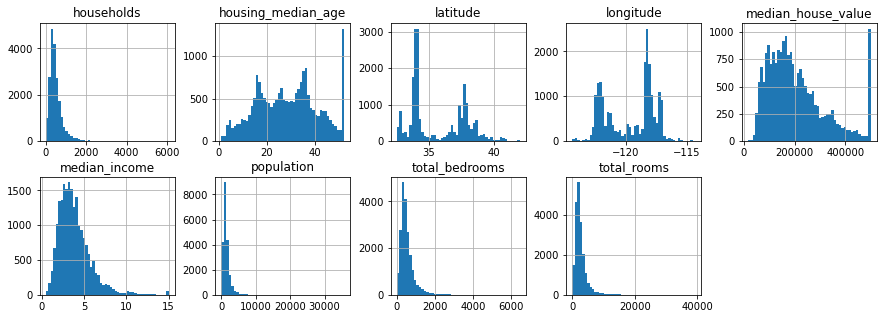

In [6]:
housing.hist(layout=[2, 5], bins=50, figsize=[15, 5])

### 1.3 Répartition des données

1. Créez un code qui partitionne les données en base d’apprentissage et base de test. Optez
pour 80% pour l’apprentissage et 20% pour le test.

In [7]:
housing_train, housing_test = train_test_split(housing, test_size=0.2)

In [8]:
display(housing_train.shape, housing_test.shape)

(16512, 10)

(4128, 10)

2. Affichez l’en-tête de la base de test

In [9]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9068,-118.15,34.71,36.0,1338.0,250.0,709.0,250.0,3.5625,101400.0,INLAND
5261,-118.53,34.09,37.0,5477.0,833.0,1925.0,757.0,8.1888,500001.0,<1H OCEAN
16858,-122.41,37.63,39.0,4220.0,1055.0,2720.0,1046.0,2.6390,242500.0,NEAR OCEAN
9114,-118.22,34.63,4.0,14348.0,2145.0,5839.0,1806.0,5.3799,222400.0,INLAND
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND


Nous nous intéresserons par la suite uniquement à la base d’apprentissage. Pour cette raison, le terme données fera référence à la base d’apprentissage.

### 1.4 Découverte et visualisation des données

L’information géographique (latitude et longitude) existe dans la base de données, il est intéressant de créer des graphes illustrant une visualisation géographique des données.

1. Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude. Optez pour le type ``scatter`` dans la fonction plot pour l’affichage et une valeur d’``alpha`` (c’est un paramètre qui joue sur la transparence de la courbe) de 0.1 pour un affichage plus clair.

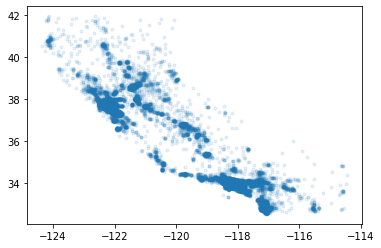

In [10]:
plt.scatter(housing_train["longitude"], housing_train["latitude"], alpha=0.1, marker=".")

2. Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le prix des maisons (target). Optez pour une valeur égale à ``False`` de "``sharex``".

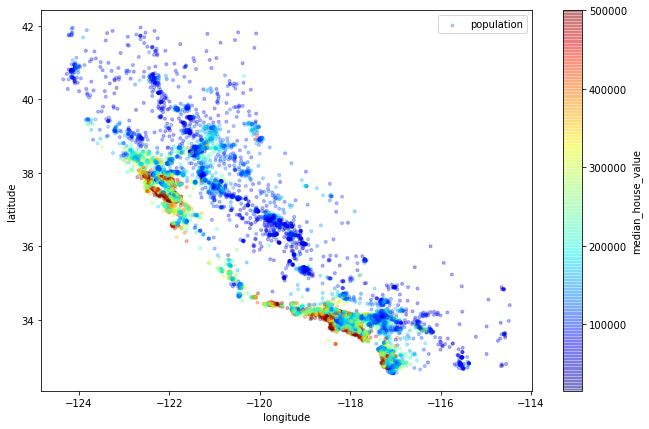

In [11]:
plt.scatter(housing_train["longitude"], housing_train["latitude"], alpha=0.3, marker=".", label="population", c=housing_train["median_house_value"], cmap='jet')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="median_house_value")
plt.legend()
plt.gcf().set_size_inches(11,7)
plt.show()

3. Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelques maisons. Pour ce faire :

• Téléchargez l’image de la californie

• Utilisez la fonction ``imread`` du sous-module image du module ``matplotlib``

• Utilisez la fonction ``imshow`` du sous-module ``pyplot`` du module ``matplotlib``

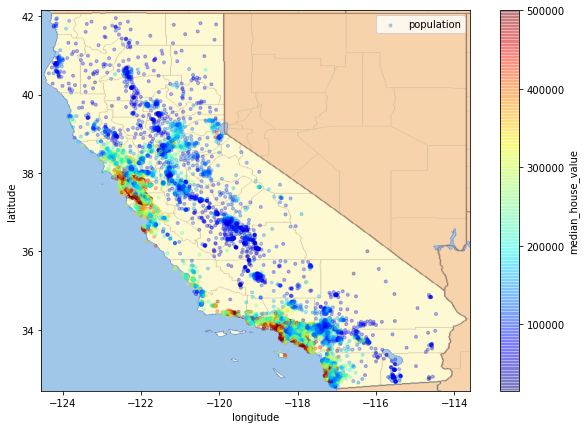

In [12]:
coord = [housing["longitude"].min()-0.2, housing["longitude"].max()+0.7, housing["latitude"].min()-0.1, housing["latitude"].max()+0.2]

plt.imshow(plt.imread("california.png"), extent=coord)
plt.scatter(housing_train["longitude"], housing_train["latitude"], alpha=0.3, marker=".", label="population", c=housing_train["median_house_value"], cmap='jet')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="median_house_value")
plt.legend()
plt.gcf().set_size_inches(11,7)
plt.show()

4. Une pratique très intéressante dans l’analyse de données est l’étude des corrélation entre les variables. Créez un code qui affiche, en valeur, la corrélation de l’attribut "``median_house_value``" avec les autres attributs. Qu’est ce que vous remarquez ?

In [13]:
display(housing_train.corr()["median_house_value"])

longitude            -0.052250
latitude             -0.140825
housing_median_age    0.109983
total_rooms           0.131450
total_bedrooms        0.049166
population           -0.026711
households            0.065595
median_income         0.688748
median_house_value    1.000000
Name: median_house_value, dtype: float64

La corrélation avec les différentes variables est très faible, exceptée une corrélation modérée et prévisible avec ``median_income``.

### 1.5 Nettoyage des données

Avant d’intégrer les données dans un algorithme d’apprentissage automatique, il est indispensable de séparer le "features" et la valeur cible (target).

1. Créez un code permettant de créer deux variables :

• Une première contenant que les input. Utilisez la fonction drop du module pandas

• Une deuxième contenant que les labels. Utilisez la fonction copy du module pandas

In [14]:
Xtrain, Xtest, ytrain, ytest = housing_train.drop(["median_house_value"], axis=1), housing_test.drop(["median_house_value"], axis=1), housing_train["median_house_value"], housing_test["median_house_value"]  

In [15]:
display(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(16512, 9)

(4128, 9)

(16512,)

(4128,)

2. Dans la question 8, vous avez dû remarquer que l’attribut "total_bedrooms" a des valeurs manquantes (NaN). Pour remédier à ceci, il existes trois options :

• Supprimer les valeurs manquantes (NaN)

• Supprimer l’attribut "``total_bedrooms``"

• Remplacer les valeurs manquantes par une autre valeur (0, la moyenne, la médiane, . . . ). Nous optons pour cette méthode. Ecrivez un code qui remplace les valeurs manquantes par la médiane. Utilisez les fonctions ``median`` et ``fillna`` du module ``Pandas``. Vérifiez avec la fonction "``info``" si le problème a été résolu.

In [16]:
housing = housing.fillna(housing.mean())
housing_train = housing_train.fillna(housing.mean())
housing_test = housing_test.fillna(housing.mean())
Xtrain = Xtrain.fillna(housing.mean())
Xtest = Xtest.fillna(housing.mean())

In [17]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 5906 to 18355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


3. Les algorithmes d’apprentissage profond préfère de travailler avec les données numériques. Ceci est valable pour tous les attributs sauf "``ocean_proximity``". Vérifiez ceci en affichant 10 de ces valeurs. Transformer les valeurs qualitatives en des valeurs numériques.

In [18]:
le = LabelEncoder()
le.fit(housing_train["ocean_proximity"])

LabelEncoder()

In [19]:
housing["ocean_proximity"] = le.transform(housing["ocean_proximity"])
housing_train["ocean_proximity"] = le.transform(housing_train["ocean_proximity"])
housing_test["ocean_proximity"] = le.transform(housing_test["ocean_proximity"])
Xtrain["ocean_proximity"] = le.transform(Xtrain["ocean_proximity"])
Xtest["ocean_proximity"] = le.transform(Xtest["ocean_proximity"])

4. Affichez les données pour vérifier le résultat.

In [20]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5906,-118.43,34.30,28.0,271.0,61.0,246.0,62.0,1.7062,164600.0,0
20487,-118.67,34.30,5.0,6123.0,825.0,2440.0,736.0,7.9013,393000.0,0
11590,-118.01,33.78,26.0,2343.0,377.0,1166.0,373.0,6.0000,233100.0,0
15758,-122.44,37.77,52.0,2002.0,520.0,939.0,501.0,3.2239,488900.0,3
8253,-118.17,33.77,36.0,2933.0,881.0,2077.0,838.0,2.2538,181300.0,4
...,...,...,...,...,...,...,...,...,...,...
441,-122.30,37.87,52.0,3123.0,749.0,1695.0,684.0,2.2208,144800.0,3
17951,-121.96,37.34,34.0,1461.0,299.0,739.0,276.0,3.4375,252600.0,0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,1
13238,-117.67,34.13,10.0,2846.0,362.0,1221.0,355.0,7.7234,304100.0,1


### 2 Sélection, apprentissage et évaluation du modèle

1. Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage.

In [21]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

2. Créez un code qui prédit les classes de la base d’apprentissage. Pour ce faire, utilisez la méthode ``predict`` de la classe ``LinearRegression`` en donnant comme argument les données d’apprentissage. Ensuite, affichez les valeurs cible réelles et celles prédites.

In [22]:
y_pred = lr.predict(Xtrain)

In [23]:
display("valeurs réelles :", np.array(ytrain), "valeurs prédites :", y_pred)

'valeurs réelles :'

array([164600., 393000., 233100., ..., 124700., 304100., 500001.])

'valeurs prédites :'

array([116471.06416726, 336307.94435461, 289947.26759499, ...,
       197684.05390762, 302783.55973116, 549943.45739095])

3. Calculez la mesure RMSE du modèle de la régression linéaire.

In [24]:
mean_squared_error(np.array(ytrain), y_pred)

4861192642.1785345

4. Refaites les deux étapes précédentes avec le modèle ``DecisionTreeRegressor``. Calculez la mesure RMSE du modèle ``DecisionTreeRegressor`` qui existe dans le sous-module ``tree`` du module ``sklearn``.

In [25]:
dtr = DecisionTreeRegressor()
dtr.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [26]:
y_pred2 = dtr.predict(Xtrain)

In [27]:
display("valeurs réelles :", np.array(ytrain), "valeurs prédites :", y_pred2)

'valeurs réelles :'

array([164600., 393000., 233100., ..., 124700., 304100., 500001.])

'valeurs prédites :'

array([164600., 393000., 233100., ..., 124700., 304100., 500001.])

In [28]:
mean_squared_error(np.array(ytrain), y_pred2)

0.0

5. Même si la valeur de RMSE de ``DecisionTreeRegressor`` est égale à 0, on ne peut pas conclure que ce modèle fonctionne parfaitement sur la base d’apprentissage. Pour s’assurer, on va répartir la base d’apprentissage en base d’apprentissage et en base de test en utilisant la méthode 10-fold cross-validation. Pour ce faire, utilisez la fonction ``cross_val_score`` du sousmodule ``model_selection`` du module ``sklearn``. Ensuite, affichez :

• La valeur MSE de chaque fold

In [29]:
cvs = cross_val_score(dtr, Xtrain, ytrain, cv=10)

In [30]:
cvs

array([0.64326615, 0.65903629, 0.65720074, 0.68677775, 0.61464729,
       0.58162886, 0.64911379, 0.62286768, 0.65965648, 0.6457604 ])

• La moyenne des MSE de tous les folds

In [31]:
cvs.mean()

0.6419955421502139

• L’écart type de tous les folds

In [32]:
cvs.std()

0.02768273182133536

6. Suivre les étapes de la question précédente sur le modèle de la régression linéaire. Ensuite, comparez les résultats avec ceux du ``DecisionTreeRegressor``. Quel modèle présente un problème d’apprentissage ? pourquoi ?

In [33]:
cvs2 = cross_val_score(lr, Xtrain, ytrain, cv=10)
cvs2

array([0.58917493, 0.62631519, 0.64395506, 0.67985994, 0.62794719,
       0.61341519, 0.6581481 , 0.63970126, 0.65462796, 0.63728584])

In [34]:
cvs2.mean()

0.6370430650404357

In [35]:
cvs2.std()

0.023854336644455524

Les deux méthodes ont une performance similaire, même si ``LogisticRegression`` a un écart-type légèrement moindre.

## 3 Fine-Tunning

### 3.1 Grid Search

Dans cette, partie nous allons chercher les paramètres du modèle de régression qui donnent les meilleurs résultats

1. Écrire un code qui :

• Crée un objet de la classe ``RandomForestRegressor``

In [36]:
rfr = RandomForestRegressor()

• Crée la variable suivante :

``param_grid = {"n_estimators" : [3, 10, 30], "max_ features" : [2, 4, 6, 8]}``

In [37]:
param_grid = {"n_estimators" : [3, 10, 30], "max_features" : [2, 4, 6, 8]}

Cette variable contient un dictionnaire avec quelques valeurs de deux paramètres de la méthode ``RandomForestRegressor``. Au total, 4x3=12 combinaisons vont être testées.

• Applique une recherche, de type ``GridSearch``, du couple qui donne le meilleur résultat. Pour ce faire, utilisez la fonction ``GridSearchCV`` du sous-module ``model_selection`` du module ``sklearn``. Optez pour une valeur de 5 pour "``cv``" (une validation croisée de type 5-fold cross-validation)

In [38]:
gscv = GridSearchCV(rfr, param_grid, cv=5)

In [39]:
gscv.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

2. Affichez les meilleurs paramètres de la méthode RandomForestRegressor en utilisant la fonction ``best_params_``

In [40]:
gscv.best_params_

{'max_features': 4, 'n_estimators': 30}

3. Affichez les résultats des 12 combinaisons avec la fonction ``grid-search``

In [41]:
gscv.cv_results_

{'mean_fit_time': array([0.0941515 , 0.27923846, 0.79994025, 0.13632421, 0.47752099,
        1.24208732, 0.17708945, 0.56967597, 1.70461802, 0.22106771,
        0.72578211, 2.15256629]),
 'std_fit_time': array([0.01342548, 0.01675392, 0.0229946 , 0.01537249, 0.0671231 ,
        0.0074419 , 0.00146974, 0.00209534, 0.01380517, 0.00172747,
        0.00553161, 0.01481825]),
 'mean_score_time': array([0.00679331, 0.01359382, 0.03197975, 0.00619774, 0.01519284,
        0.03118868, 0.00580244, 0.0125948 , 0.03118839, 0.00539827,
        0.0125946 , 0.03117952]),
 'std_score_time': array([0.00074659, 0.0022418 , 0.00108732, 0.00039992, 0.00182004,
        0.0007529 , 0.00040195, 0.00048957, 0.00099123, 0.00080013,
        0.00080014, 0.00074318]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obj

### 3.2 Evaluation sur la base de test

Testez votre modèle d’apprentissage sur la base de test. Pour ce faire, pensez à :

1. Remplacer les valeurs NaN de l’attribut "``total_bedrooms``" de la base de test par la médiane

2. Transformer les valeurs textuelles de "``ocean_proximity``" en valeurs numériques

3. Stocker le modèle d’apprentissage dans une variable en utilisant la fonction ``best_estimator_`` du module ``GridSearchCV``

In [42]:
gscv2 = gscv.best_estimator_
gscv2

RandomForestRegressor(max_features=4, n_estimators=30)

4. Calculer la valeur RMSE du modèle sur la base de test

In [46]:
y_pred3 = gscv2.predict(Xtest)

In [47]:
mean_squared_error(np.array(ytest), y_pred3)

2327098840.700166